In [11]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
from matplotlib import pyplot as plt

In [12]:
df = pd.read_csv('data\jobs_housing_clean.csv', thousands=',')
df = df.drop(columns=['Unnamed: 0','lat','lon','Geographic Area Name'])
df['housing_job_dif'] =  df['jobs_march_2019'] - df['housing_units']
df.dtypes

Area                object
jobs_march_2019      int64
housing_units        int64
avg_weekly_wage    float64
unit_per_job       float64
housing_job_dif      int64
dtype: object

In [16]:
#correlations 
slope, intercept, r_value, p_value, std_err = stats.linregress(df['unit_per_job'],df['avg_weekly_wage'])

r_squared = round(r_value**2,2)
print('jobs vs. wages')
print('r-squared: ',r_squared)
print('slope: ',round(slope,2))
print('intercept: ',round(intercept))
print('p-value: ',round(p_value))

jobs vs. wages
r-squared:  0.32
slope:  -137.46
intercept:  1029.0
p-value:  0.0


Text(1.59, 625, 'Correlation = 0.32')

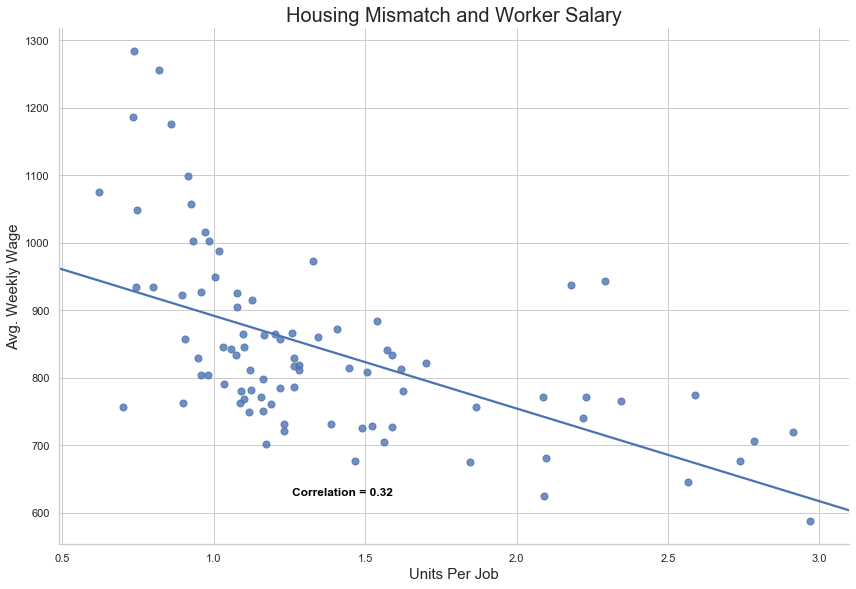

In [29]:
#scatter
#fig, ax = plt.subplots()
#fig.set_size_inches(12,8)
ax = sns.lmplot(x='unit_per_job', 
                y='avg_weekly_wage',
                data=df,
                fit_reg=True,
                markers="o", 
                scatter_kws={'s':50},
                height=8,
                aspect=1.5,
                legend=False,
                ci=0
                )

plt.title('Housing Mismatch and Worker Salary',size=20)
plt.xlabel('Units Per Job',size=15)
plt.ylabel('Avg. Weekly Wage',size=15)
#plt.xlim(1000, 82000)
#plt.legend(loc='upper right')
#plt.ylim(0, None)
plt.text(1.59, 625, "Correlation = 0.32", horizontalalignment='right', size='medium', color='black', weight='semibold')
#plt.text(80000, 7500, "Non-Charter Correlation = .18", horizontalalignment='right', size='large', color='black', weight='semibold')



(0, 833948.4590225987)

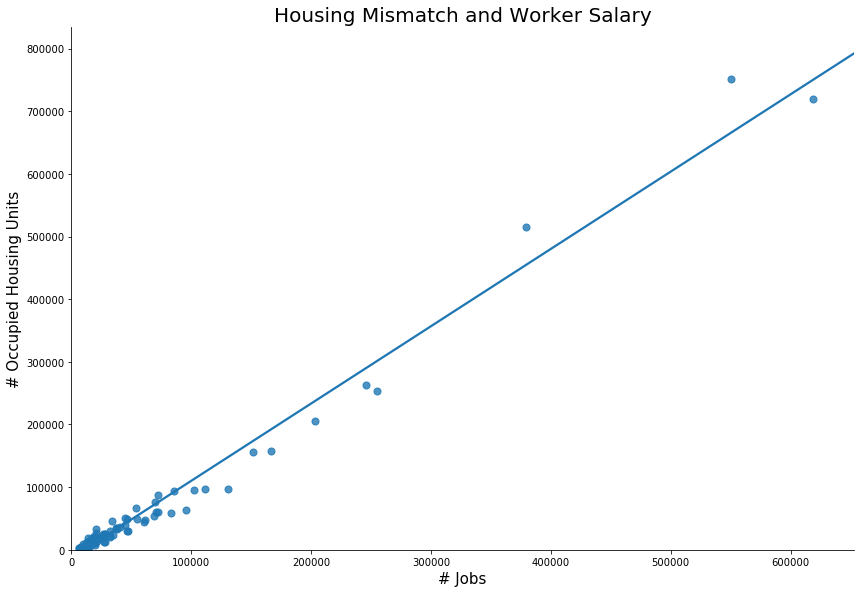

In [6]:
#scatter
#fig, ax = plt.subplots()
#fig.set_size_inches(12,8)
ax = sns.lmplot(y='jobs_march_2019', 
                x='housing_units',
                data=df,
                fit_reg=True,
                markers="o", 
                scatter_kws={'s':50},
                height=8,
                aspect=1.5,
                legend=False,
                ci=0
                )

plt.title('Housing Mismatch and Worker Salary',size=20)
plt.ylabel('# Occupied Housing Units',size=15)
plt.xlabel('# Jobs',size=15)
plt.xlim(0, None)
#plt.legend(loc='upper right')
plt.ylim(0, None)
#plt.text(1.59, 625, "Correlation = 0.44", horizontalalignment='right', size='medium', color='black', weight='semibold')
#plt.text(80000, 7500, "Non-Charter Correlation = .18", horizontalalignment='right', size='large', color='black', weight='semibold')



(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87]), <a list of 88 Text xticklabel objects>)

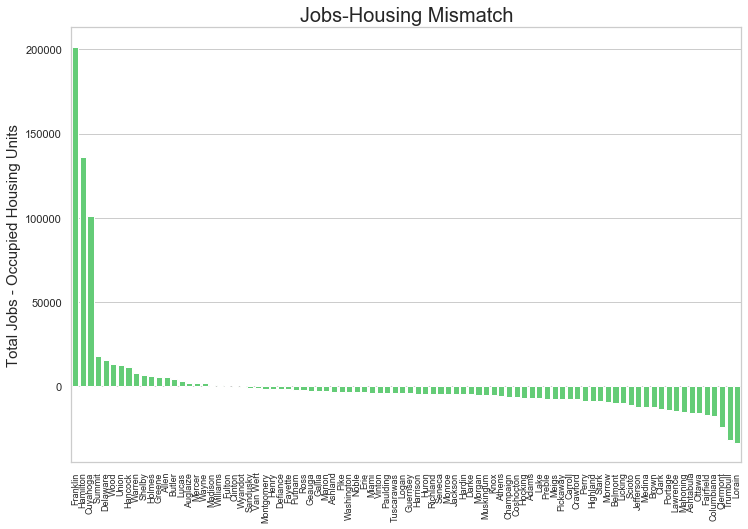

In [18]:
#bar chart - biggest to smallest gap https://sf.curbed.com/2016/10/12/12945854/bay-area-cities-jobs-housing-san-jose-palo-alto-sf
#C-bus has as big of a housing gap as San Jose, CA

df = df.sort_values(['housing_job_dif', 'Area'], ascending=[0, 1])
sns.set(style="whitegrid")
fig, ax = plt.subplots()
fig.set_size_inches(12,8)

ax = sns.barplot(x="Area", 
                 y="housing_job_dif", 
                 data=df,
                 color='#53DD6C'
                 )

plt.title('Jobs-Housing Mismatch',size=20)
plt.xlabel('',size=15)
plt.ylabel('Total Jobs - Occupied Housing Units',size=15)
plt.xticks(rotation=90, size=9)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87]), <a list of 88 Text xticklabel objects>)

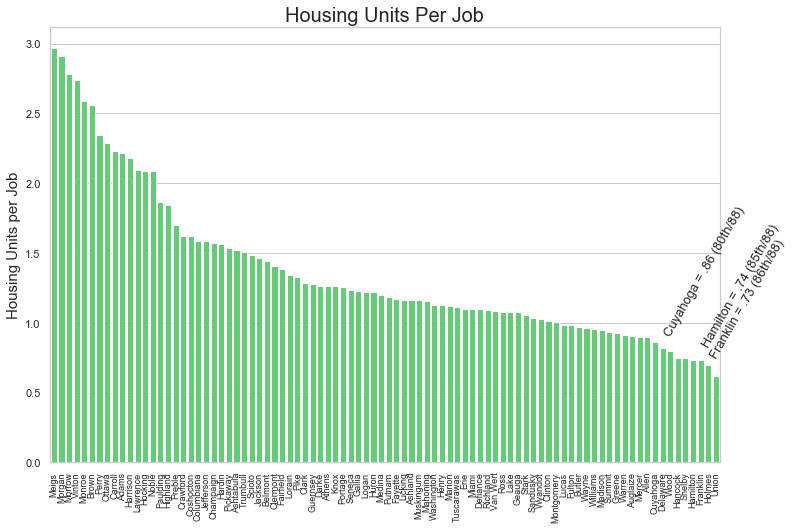

In [36]:
#bar chart - biggest to smallest gap https://sf.curbed.com/2016/10/12/12945854/bay-area-cities-jobs-housing-san-jose-palo-alto-sf
#C-bus has as big of a housing gap as San Jose, CA

df = df.sort_values(['unit_per_job', 'Area'], ascending=[0, 1])
sns.set(style="whitegrid")
fig, ax = plt.subplots()
fig.set_size_inches(12,8)

ax = sns.barplot(x="Area", 
                 y="unit_per_job", 
                 data=df,
                 color='#53DD6C'
                 )

plt.title('Housing Units Per Job',size=20)
plt.xlabel('',size=15)
plt.ylabel('Housing Units per Job',size=15)
plt.text(80,.91,'Cuyahoga = .86 (80th/88)',size=13, rotation=60)
plt.text(86,.75,'Franklin = .73 (86th/88)',size=13, rotation=60)
plt.text(85,.83,'Hamilton = .74 (85th/88)',size=13, rotation=60)
plt.xticks(rotation=90, size=9)